In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
from datetime import datetime



In [37]:
from pathlib import Path

# 1. Get your paths (as Path objects for easy naming)
directory = Path("../data/sample")
paths = [f for f in directory.rglob("NP6*.csv")]

print(paths)

# 2. Create the dictionary
# Key = file name without extension (.stem)
# Value = the loaded DataFrame
data_dict = {f.stem: pd.read_csv(f) for f in paths}

# 3. Access your data by name
print(data_dict.keys())  # See all your table names
# example_df = data_dict['january_report']




[WindowsPath('../data/sample/ercot/NP6-331-CD/2025/12/NP6-331-CD_202512.csv'), WindowsPath('../data/sample/ercot/NP6-346-CD/2025/12/NP6-346-CD_202512.csv'), WindowsPath('../data/sample/ercot/NP6-788-CD/2025/12/NP6-788-CD_202512.csv'), WindowsPath('../data/sample/ercot/NP6-905-CD/2025/12/NP6-905-CD_202512.csv')]
dict_keys(['NP6-331-CD_202512', 'NP6-346-CD_202512', 'NP6-788-CD_202512', 'NP6-905-CD_202512'])


In [38]:
type(data_dict.keys())

list = [f for f in data_dict.keys()]

df = data_dict[list[0]]

df.sample, df.columns

(<bound method NDFrame.sample of       DeliveryDate  DeliveryHour  DeliveryInterval RepeatedHourFlag ASType  \
 0       12/04/2025            24                 4                N   ECRS   
 1       12/04/2025            24                 4                N  NSPIN   
 2       12/04/2025            24                 4                N  REGDN   
 3       12/04/2025            24                 4                N  REGUP   
 4       12/04/2025            24                 4                N    RRS   
 ...            ...           ...               ...              ...    ...   
 12955   12/31/2025            24                 1                N   ECRS   
 12956   12/31/2025            24                 1                N  NSPIN   
 12957   12/31/2025            24                 1                N  REGDN   
 12958   12/31/2025            24                 1                N  REGUP   
 12959   12/31/2025            24                 1                N    RRS   
 
        MCPC  
 0 

In [39]:
df['DeliveryDate']= pd.to_datetime(df['DeliveryDate'])
df.sample(2)




,DeliveryDate,DeliveryHour,DeliveryInterval,RepeatedHourFlag,ASType,MCPC
9415,2025-12-24,15,2,N,ECRS,0.00
11895,2025-12-29,19,2,N,ECRS,0.59


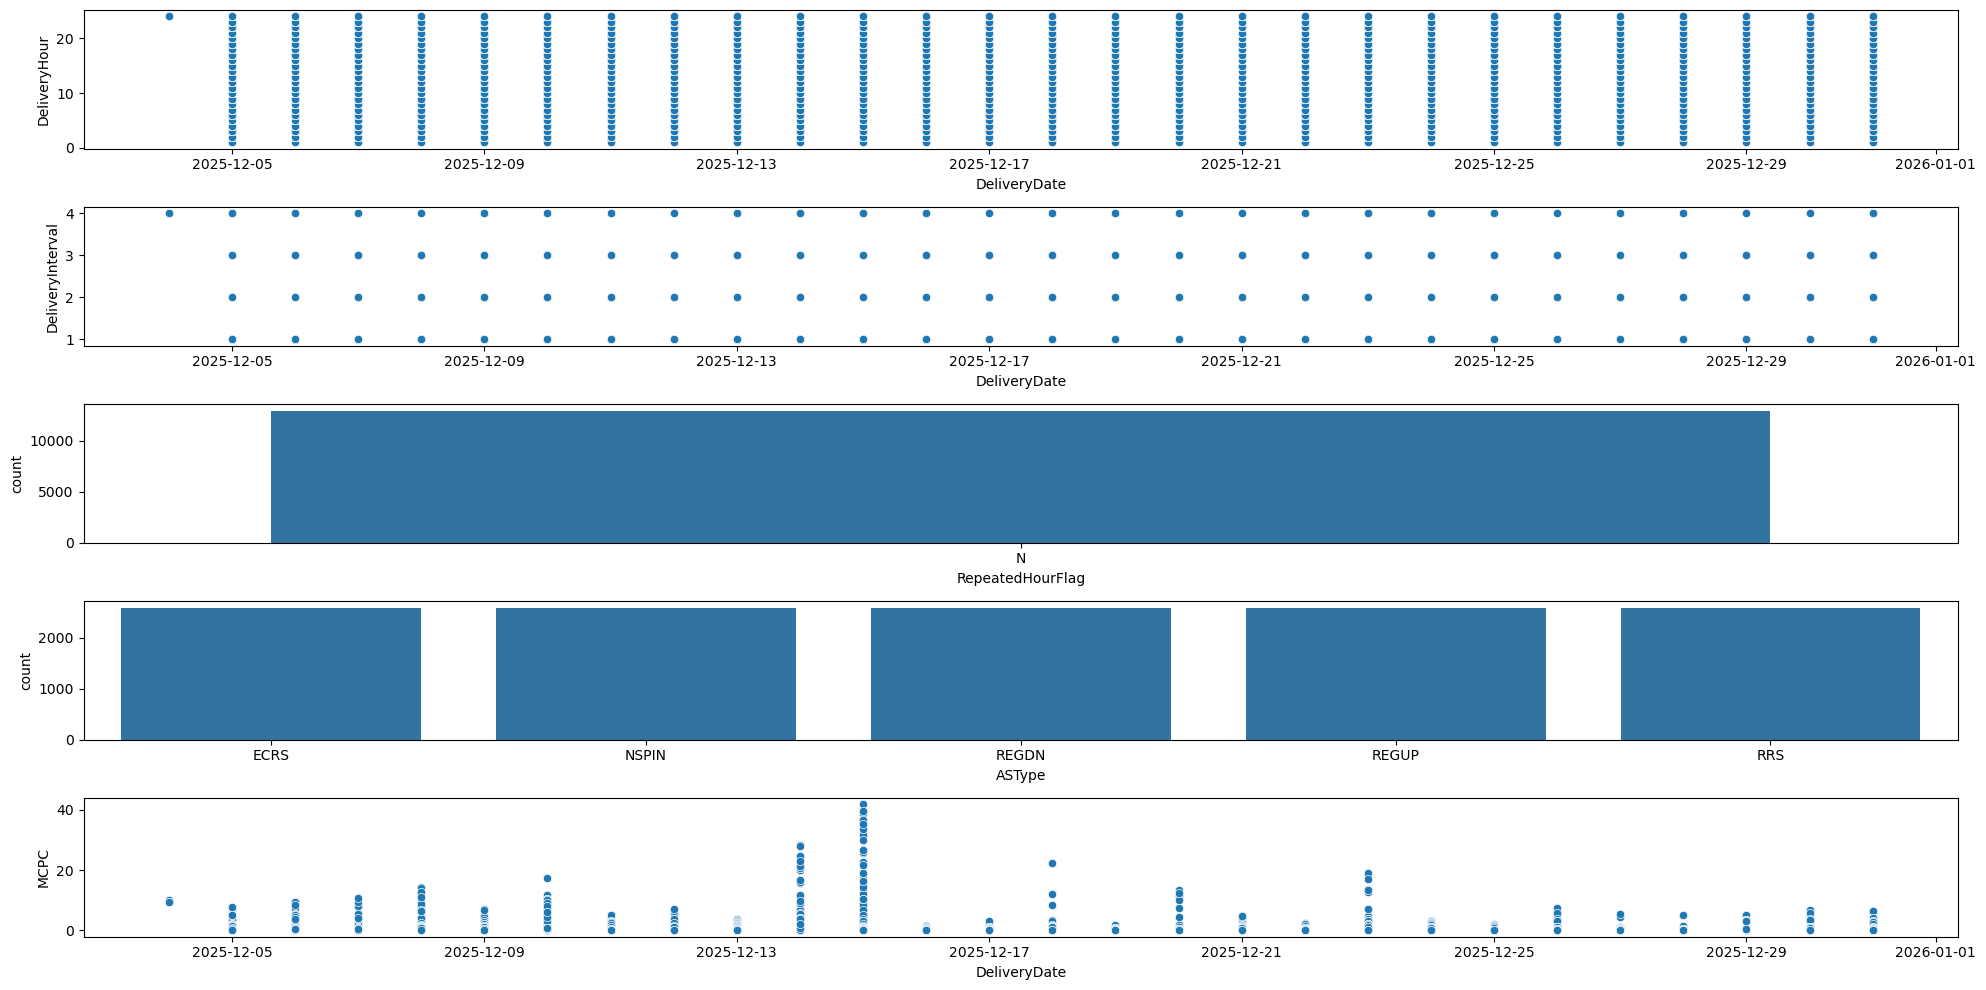

In [40]:
# Create a 2x2 grid
fig, axes = plt.subplots(5, 1, figsize=(20, 10))

# Top Left
sns.scatterplot(data=df, x="DeliveryDate", y="DeliveryHour", ax=axes[0])

# Top Right
sns.scatterplot(data=df, x="DeliveryDate", y="DeliveryInterval", ax=axes[1])

# Bottom Left
sns.countplot(data=df, x="RepeatedHourFlag",ax=axes[2])

# Bottom Right
sns.countplot(data=df, x="ASType", ax=axes[3])

sns.scatterplot(data=df, x="DeliveryDate", y="MCPC", ax=axes[4])


plt.tight_layout()




In [41]:
#for x in df['ASType'].unique():
 #   print(df.loc['ASType'==x].count())

df['ASType'].value_counts()

ASType
ECRS     2592
NSPIN    2592
REGDN    2592
REGUP    2592
RRS      2592
Name: count, dtype: int64

In [ ]:
for x, y in data_dict.items():
    print(y.columns)



Index(['DeliveryDate', 'DeliveryHour', 'DeliveryInterval', 'RepeatedHourFlag',
       'ASType', 'MCPC'],
      dtype='str')
Index(['OperDay', 'HourEnding', 'NORTH', 'SOUTH', 'WEST', 'HOUSTON', 'TOTAL',
       'DSTFlag'],
      dtype='str')
Index(['SCEDTimestamp', 'RepeatedHourFlag', 'SettlementPoint', 'LMP'], dtype='str')
Index(['DeliveryDate', 'DeliveryHour', 'DeliveryInterval',
       'SettlementPointName', 'SettlementPointType', 'SettlementPointPrice',
       'DSTFlag'],
      dtype='str')


In [46]:
dg = data_dict[list[1]]
dg.columns


Index(['OperDay', 'HourEnding', 'NORTH', 'SOUTH', 'WEST', 'HOUSTON', 'TOTAL',
       'DSTFlag'],
      dtype='str')

In [62]:
dg.loc[dg['HourEnding']=='24:00','HourEnding'] = '00:00'

dg['Date'] = dg['OperDay'] +' '+ dg['HourEnding']



dg['Date'] = pd.to_datetime(dg['Date'], format="%m/%d/%Y %H:%M")
dg.sample(5)

,OperDay,HourEnding,NORTH,SOUTH,WEST,HOUSTON,TOTAL,DSTFlag,Date
469,12/20/2025,14:00,15135.85,12314.33,9409.24,12027.02,48886.45,N,2025-12-20 14:00:00
388,12/17/2025,05:00,13574.61,10422.82,8430.19,10281.56,42709.18,N,2025-12-17 05:00:00
613,12/26/2025,14:00,17289.95,14028.12,9962.89,13644.57,54925.53,N,2025-12-26 14:00:00
576,12/25/2025,01:00,13489.63,11016.55,9118.59,11252.74,44877.52,N,2025-12-25 01:00:00
412,12/18/2025,05:00,13282.82,10148.99,9571.06,10201.23,43204.10,N,2025-12-18 05:00:00


<Axes: xlabel='Date', ylabel='HOUSTON'>

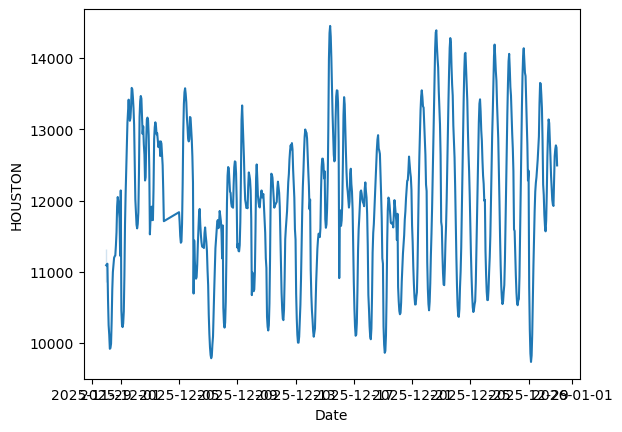

In [65]:
sns.lineplot(dg, x='Date',y='HOUSTON')